**Quantifying Engagement**

In [1]:
import pandas as pd
import ast

# read in labels column as list
generic = lambda x: ast.literal_eval(x)
conv = {'labels': generic}

image_data = pd.read_csv('images_labeled.csv', converters=conv) # read csv file

In [2]:
# Create engagement score
max_likes = max(image_data['likes']) # max number of likes
max_comments = max(image_data['comments']) # max number of comments
image_data['norm_likes'] = image_data['likes'] *1.0/max_likes # scale # of likes to value between 0-1
image_data['norm_comments'] = image_data['comments'] *1.0/max_comments # scale # of comments to value between 0-1

In [3]:
import numpy as np

# Define posts as either high engagement or low engagement
image_data['engagement_score'] = 0.4*image_data['norm_likes'] + 0.6*image_data['norm_comments'] # take weighted average
median_engagement = np.median(image_data['engagement_score']) # find median value
image_data['binary_engagement'] = np.where(image_data['engagement_score'] > median_engagement, 1, 0) # define top 50% of posts as high engagement
image_data

,index,image_name,likes,comments,captions,url,labels,norm_likes,norm_comments,engagement_score,binary_engagement
0,0,GraphImage,66824,393,"Photo by Trevor Frost @tbfrost | Yes, that is ...",https://instagram.frnd1-1.fna.fbcdn.net/v/t51....,"[display window, window, framework, supporting...",0.041378,0.030240,0.034695,0
1,1,GraphSidecar,493695,2187,Photo by George Steinmetz @geosteinmetz | Octo...,https://instagram.frnd1-1.fna.fbcdn.net/v/t51....,"[purl stitch, needlework, herringbone fabric, ...",0.305698,0.168283,0.223249,1
2,2,GraphImage,317747,769,Photo by Michaela Skovranova @mishkusk | Scarl...,https://instagram.frnd1-1.fna.fbcdn.net/v/t51....,"[hummingbird, bird, animal, finch, passerine, ...",0.196750,0.059172,0.114203,0
3,3,GraphImage,216888,509,Photo by @katieorlinsky | Kristin Knight Pace ...,https://instagram.frnd1-1.fna.fbcdn.net/v/t51....,"[dogsled, sled, vehicle, sled dog, dog, domest...",0.134298,0.039166,0.077219,0
4,4,GraphImage,215688,308,Photo by Stephen Alvarez @salvarezphoto | A Pa...,https://instagram.frnd1-1.fna.fbcdn.net/v/t51....,"[rock, nature, Night Sky, Rock Arch, blue color]",0.133555,0.023700,0.067642,0
5,5,GraphImage,444131,1380,"Photo by @brianskerry | A sperm whale calf, wi...",https://instagram.frnd1-1.fna.fbcdn.net/v/t51....,"[sperm whale, whale, aquatic mammal, mammal, a...",0.275008,0.106187,0.173715,1
6,6,GraphSidecar,224030,446,Photos by @carltonward | The future of the Flo...,https://instagram.frnd1-1.fna.fbcdn.net/v/t51....,"[grey birch, birch, tree, plant, black birch, ...",0.138720,0.034318,0.076079,0
7,7,GraphSidecar,363473,1590,Photos by @dina_litovsky | At Hawaii Volcanoes...,https://instagram.frnd1-1.fna.fbcdn.net/v/t51....,"[volcano, nature, natural elevation, reddish o...",0.225064,0.122345,0.163433,1
8,8,GraphImage,413309,1134,Photo by Ivan Kashinsky @ivankphoto | Vines gr...,https://instagram.frnd1-1.fna.fbcdn.net/v/t51....,"[Barndoor, barn, farm building, building, shed...",0.255923,0.087258,0.154724,1
9,9,GraphImage,309818,1178,Photo by Muhammed Muheisen @mmuheisen | Regist...,https://instagram.frnd1-1.fna.fbcdn.net/v/t51....,"[sky, Gray Sky, abbey (monastry like), religio...",0.191841,0.090643,0.131122,1


**Predicting Engagement**

In [4]:
def convert_list_to_string(label_list):
    """Convert list of strings into single string"""
    label_string = '' # initialize empty string
    for i in label_list:
        label_string = label_string + ' ' + i # add next word to string
    return label_string

string_labels = image_data['labels'].map(convert_list_to_string) # get single 'document' for each image

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def tfidf_classification(X, y):
    """Obtain TF-IDF scores and run logistic regression. Outputs accuracy score."""
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2) # 70/30 train-test split
    # count occurence of each word, convert to TF-IDF representation, and perform logistic regression
    tfidf_pipeline = Pipeline([('count', CountVectorizer()),\
                               ('tfidf',TfidfTransformer()),\
                               ('classifier', LogisticRegression())])
    tfidf_pipeline.fit(x_train, y_train) # fit model to training data
    y_pred = tfidf_pipeline.predict(x_test) # predict on test data
    return accuracy_score(y_test, y_pred) # obtain accuracy score

In [6]:
# predict using image labels
tfidf_classification(string_labels, image_data['binary_engagement'])

C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.65

In [7]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 

stop_words = set(stopwords.words('english')) 
lemmatizer = WordNetLemmatizer()

def preprocess_text(sentence):
    lemmatized = []
    word_tokens = word_tokenize(sentence)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    for word in filtered_sentence:
        lemmatized.append(lemmatizer.lemmatize(word))
    return convert_list_to_string(lemmatized)

In [8]:
captions_wo_stopwords = image_data['captions'].map(preprocess_text)
tfidf_classification(captions_wo_stopwords, image_data['binary_engagement'])

0.6714285714285714

In [9]:
# predict using post caption
tfidf_classification(image_data['captions'], image_data['binary_engagement'])

0.7

In [10]:
# predict using captions and labels
image_data['captions_and_labels'] = image_data['captions'] + string_labels # create one document with caption and label
tfidf_classification(image_data['captions_and_labels'], image_data['binary_engagement'])

0.7142857142857143

In [11]:
captions_labels_preprocessed = image_data['captions_and_labels'].map(preprocess_text)
tfidf_classification(captions_labels_preprocessed, image_data['binary_engagement'])

0.7142857142857143

**Topic Modeling**

In [12]:
import lda

lda_count = CountVectorizer() # instantiate count vectorizer
X = lda_count.fit_transform(captions_labels_preprocessed) # get term document matrix for captions and labels
vocab = lda_count.get_feature_names() # vocabulary includes all words that appeared in the captions and labels

lda_model = lda.LDA(n_topics=5, n_iter=1500, random_state=2) # run LDA with 5 topics and 1500 iterations
lda_model.fit(X) # fit the model to the corpus containing all captions and labels
topic_word = lda_model.topic_word_
n_top_words = 20 # number of words to display per topic

# Print top words for each topic
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, '/'.join(topic_words)))

INFO:lda:n_documents: 465
INFO:lda:vocab_size: 8533
INFO:lda:n_words: 39210
INFO:lda:n_topics: 5
INFO:lda:n_iter: 1500
C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\lda\utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:lda:<0> log likelihood: -436618
INFO:lda:<10> log likelihood: -363516
INFO:lda:<20> log likelihood: -358546
INFO:lda:<30> log likelihood: -355818
INFO:lda:<40> log likelihood: -354317
INFO:lda:<50> log likelihood: -353550
INFO:lda:<60> log likelihood: -352913
INFO:lda:<70> log likelihood: -352011
INFO:lda:<80> log likelihood: -351471
INFO:lda:<90> log likelihood: -350968
INFO:lda:<100> log likelihood: -350357
INFO:lda:<110> log likelihood: -349968
INFO:lda:<120> log likelihood: -349689
INFO:lda:<130> log likelihood: -349441
INFO:lda:<140> log likelihood: -349113
INF

Topic 0: woman/color/person/photo/story/for/people/red/sport/photographed/girl/indian/life/next/week/follow/geo/nat/share/natgeo
Topic 1: color/photo/nature/natural/the/world/ice/follow/mountain/elevation/blue/sky/change/climate/gray/for/water/slope/river/land
Topic 2: animal/color/mammal/photo/to/black/lion/bird/snake/wildlife/see/wild/follow/the/tiger/conservation/cub/light/carnivore/seal
Topic 3: year/one/color/like/the/time/it/day/people/image/in/life/home/first/dog/this/back/many/photo/child
Topic 4: color/photo/sea/whale/blue/water/the/fish/follow/national/shark/ocean/animal/in/one/building/geographic/world/new/part


**Topic 0:** People  
**Topic 1:** Scenery  
**Topic 2:** Animals  
**Topic 3:** Time  
**Topic 4:** Marine Life  

In [13]:
# create dataframe of topic probabilities
topics_df = pd.DataFrame(lda_model.doc_topic_, columns=['Topic 0', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4'])

topic = []
for row in range(len(topics_df)):
    topic.append(topics_df.iloc[row].idxmax()) # find most probable topic for each image
topics_df['Topic'] = topic # create new column with most probable topic

In [14]:
# Save topic data and labels to csv file
topics_df.to_csv('image_topics.csv', index=False)

In [15]:
# Split dataframe into four quantiles based on engagement score (quantile 3 has highest engagement, 0 has lowest)
quantiles = pd.qcut(image_data['engagement_score'], q=4, labels=False)
high_engagement = topics_df[quantiles == 3] # get high engagement posts
low_engagement = topics_df[quantiles == 0] # get low engagement posts

In [16]:
# Get topic distributions
topic_dist = (topics_df['Topic'].value_counts()*100.0/len(topics_df)).sort_index() # full data set
high_eng_dist = (high_engagement['Topic'].value_counts()*100.0/len(high_engagement)).sort_index() # high engagement posts only
low_eng_dist = (low_engagement['Topic'].value_counts()*100.0/len(low_engagement)).sort_index() # low engagement posts only

**Visualizations**

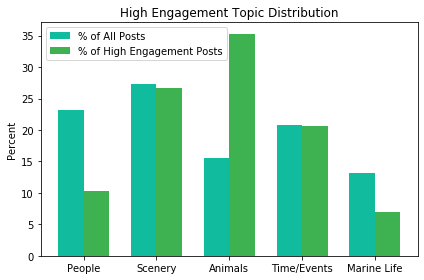

In [19]:
import matplotlib.pyplot as plt

labels = ['People', 'Scenery', 'Animals','Time/Events','Marine Life'] # assign topic labels
x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots()
# plot full topic distribution
rects_all = ax.bar(x - width/2, topic_dist, width, label='% of All Posts', color='#11BC9E')
# plot high engagement topic distribution
rects_high = ax.bar(x + width/2, high_eng_dist, width, label='% of High Engagement Posts', color='#3EB250') 

# Add axis labels and title
ax.set_ylabel('Percent')
ax.set_title('High Engagement Topic Distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

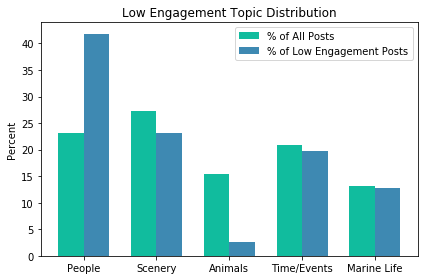

In [18]:
fig, ax = plt.subplots()
# plot full topic distribution
rects_all = ax.bar(x - width/2, topic_dist, width, label='% of All Posts', color='#11BC9E')
# plot low engagement topic distribution
rects_low = ax.bar(x + width/2, low_eng_dist, width, label='% of Low Engagement Posts', color='#3E89B2')

# Add axis labels and title
ax.set_ylabel('Percent')
ax.set_title('Low Engagement Topic Distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()